<a href="https://colab.research.google.com/github/KavyaNair01/Machine_Learning/blob/main/humana_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np

In [ ]:
# for i in range(50):
#   if i<10:
#     tmp=pd.read_csv(f'/content/drive/MyDrive/humana_train.csv/part-0000{i}-87d80db5-e35b-45d3-98e7-77ca63203dc4-c000.csv')
#   else:
#     tmp=pd.read_csv(f'/content/drive/MyDrive/humana_train.csv/part-000{i}-87d80db5-e35b-45d3-98e7-77ca63203dc4-c000.csv')
#   if i==0:
#     df=tmp
#   else:
#     df=pd.concat([df,tmp],axis=0,ignore_index=True)


# df.head()



,id,preventive_visit_gap_ind,cms_frailty_ind,cms_tot_ma_payment_amt,cms_tot_partd_payment_amt,atlas_recfacpth14,atlas_ffrpth14,atlas_fsrpth14,atlas_grocpth14,atlas_povertyallagespct,...,TEX_elig_cnt,TFP_elig_cnt,TRC_(MRP)_elig_cnt,TRC_(PED)_elig_cnt,HEDIS_comp_cnt,Patient_Experience_comp_cnt,Patient_Safety_comp_cnt,HEDIS_elig_cnt,Patient_Experience_elig_cnt,Patient_Safety_elig_cnt
0,1000073,0,0.0,481.0,0.0,0.0,0.0,1.0,0.0,11.0,...,NaN,NaN,NaN,NaN,1.0,2.0,NaN,2.0,4.0,NaN
1,1000096,0,0.0,1017.0,84.0,0.0,0.0,1.0,0.0,22.0,...,NaN,NaN,1.0,1.0,1.0,NaN,2.0,4.0,NaN,2.0
2,1000113,1,0.0,758.0,0.0,0.0,0.0,0.0,0.0,12.0,...,8.0,NaN,NaN,NaN,NaN,28.0,NaN,NaN,36.0,NaN
3,1000240,1,0.0,377.0,245.0,0.0,0.0,0.0,0.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000369,1,0.0,809.0,72.0,0.0,0.0,0.0,0.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0


In [69]:
train_df=pd.read_csv('/content/drive/MyDrive/humana_train.csv/final_train_trian.csv', low_memory=False)

In [70]:
test_df=pd.read_csv('/content/drive/MyDrive/humana_train.csv/final_train_test.csv')

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [72]:
feature_cols=train_df.drop(['Unnamed: 0','preventive_visit_gap_ind'], axis=1).columns

In [5]:
param_grid={'n_estimators':[750, 1000,1250,1500],
              'max_depth':[ 6, 7, 8, 9],
              'learning_rate':[0.1,  0.01, 0.001, 0.005],
              'reg_lambda':[ 10, 100,500, 1000, 2000],
              'reg_alpha':[0, 0.25,0.5,0.75, 1, 1.5] ,
              'colsample_bytree':[0.5,0.6, 0.7,0.8,0.9],
              'min_child_weight':[5,50,100,200,250]
           }

In [ ]:
xgbc=XGBClassifier(objective='binary:logistic', device='cuda', tree_method='hist')
clf=RandomizedSearchCV(xgbc,
                   param_grid,  n_iter=100, scoring='roc_auc', cv=3, verbose=3, random_state=1111)
clf.fit(train_df[feature_cols],train_df['preventive_visit_gap_ind'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=6, min_child_weight=200, n_estimators=750, reg_alpha=1.5, reg_lambda=2000;, score=0.728 total time=  47.9s
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=6, min_child_weight=200, n_estimators=750, reg_alpha=1.5, reg_lambda=2000;, score=0.729 total time=  45.0s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=6, min_child_weight=200, n_estimators=750, reg_alpha=1.5, reg_lambda=2000;, score=0.728 total time=  46.8s
[CV 1/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, min_child_weight=250, n_estimators=1250, reg_alpha=1.5, reg_lambda=2000;, score=0.703 total time= 1.3min
[CV 2/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, min_child_weight=250, n_estimators=1250, reg_alpha=1.5, reg_lambda=2000;, score=0.703 total time= 1.2min
[CV 3/3] END colsample_bytree=0.9, learning_rate=0.001, max_depth=7, min_

In [ ]:
pd.DataFrame(clf.cv_results_).to_csv('/content/drive/MyDrive/humana_train.csv/train_cv_results.csv')

In [ ]:
pd.DataFrame(clf.best_params_).to_csv('/content/drive/MyDrive/humana_train.csv/train_cv_bestparams.csv')

In [7]:
#single_model
xgbc_single=XGBClassifier(objective='binary:logistic', device='cuda', colsample_bytree=0.9,learning_rate=0.1,max_depth=9,min_child_weight=200,n_estimators=1250,reg_alpha=0.25,reg_lambda=100)
xgbc_single.fit(train_df[feature_cols],train_df['preventive_visit_gap_ind'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=200, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
import pickle

# save
with open('/content/drive/MyDrive/humana_train.csv/xgbc_best.pkl','wb') as f:
    pickle.dump(xgbc_single,f)

In [9]:
from sklearn.metrics import *


In [41]:
train_preds=xgbc_single.predict(train_df[feature_cols])
test_preds=xgbc_single.predict(test_df[feature_cols])

In [43]:
confusion_matrix(train_preds,train_df['preventive_visit_gap_ind'] )

array([[499669, 168299],
       [ 88640, 312924]])

In [42]:
confusion_matrix(test_preds,test_df['preventive_visit_gap_ind'] )

array([[211125,  75992],
       [ 41383, 129872]])

In [26]:
train_score=pd.DataFrame(xgbc_single.predict_proba(train_df[feature_cols]), columns=['p0','p1'])

In [27]:
test_score=pd.DataFrame(xgbc_single.predict_proba(test_df[feature_cols]), columns=['p0','p1'])

In [33]:
roc_auc_score(train_df['preventive_visit_gap_ind'],train_score['p1'])

0.8402052529553179

In [32]:
roc_auc_score(test_df['preventive_visit_gap_ind'],test_score['p1'])

0.8210267466534402

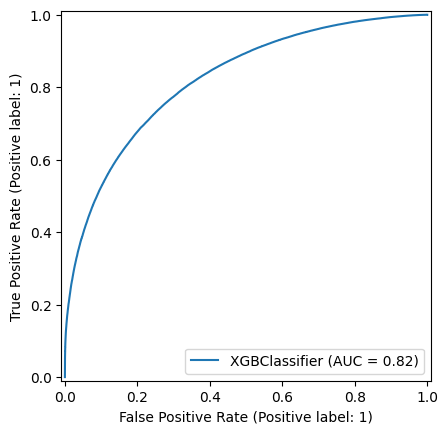

In [35]:
RocCurveDisplay.from_estimator(xgbc_single,test_df[feature_cols], test_df['preventive_visit_gap_ind'])

In [15]:
feat_imp=pd.DataFrame({'columns':feature_cols,'value':xgbc_single.feature_importances_})

In [17]:
feat_imp_short=feat_imp.loc[feat_imp['value']>0].sort_values(by='value', ascending=False)

In [19]:
feat_imp_short.head(25)

,columns,value
248,2021_preventative_visit,0.048340
232,veteran_ind,0.044312
95,total_net_paid_pmpm_cost,0.037943
111,riskarr_downside,0.035870
271,2022_preventative_visit,0.035518
229,generic_grouper,0.035086
227,lis_ind,0.017998
230,unattributed_provider,0.016605
226,disabled_ind,0.013767
128,rx_days_since_last_script,0.013641


In [80]:
feat_imp_short.to_csv('/content/drive/MyDrive/humana_train.csv/xgbc_feat_imp.csv')

In [45]:
!pip install shap
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 42.8 MB/s eta 0:00:00


In [46]:
 test_sample_shap= shap.utils.sample(test_df[feature_cols], 250000)

In [48]:
explainer = shap.Explainer(xgbc_single.predict, test_sample_shap)


In [52]:
shap_values = explainer(test_df[feature_cols], max_evals=1000000)

PermutationExplainer explainer:   0%|          | 7/458372 [1:36:25<122762:19:06, 964.18s/it]


KeyboardInterrupt: 

In [60]:
! pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 8.9 MB/s eta 0:00:00


In [63]:
import skopt

In [65]:
from skopt import BayesSearchCV
# parameter ranges are specified by one of below
from skopt.space import Real, Categorical, Integer

In [78]:
xgbc_bayseian=XGBClassifier(objective='binary:logistic', device='cuda',colsample_bytree=0.9)

In [79]:
param_grid={'n_estimators':[ 1000,1100,1200,1250,1300,1400],
              'max_depth':[ 8, 9,10],
              'learning_rate':[0.125, 0.1,0.075, 0.05,  0.025],
              'reg_lambda':[90,95,100,125,150],
              'reg_alpha':[0.125,0.25,0.35,0.45,0.5] ,
             'colsample_bylevel':[0.6,0.7,0.8,0.9],
              'min_child_weight':[175,200,225,250]
           }

In [83]:
 opt = BayesSearchCV(xgbc_bayseian,param_grid,n_iter=50,  scoring='roc_auc',cv=3,refit=True, error_score='raise',return_train_score=True, random_state=777)
 opt.fit(train_df[list(feat_imp_short['columns'])],train_df['preventive_visit_gap_ind'])

BayesSearchCV(cv=3,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=0.9, device='cuda',
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=Non...
                                      random_state=None, ...),
              random_state=777, return_train_score=True, scoring='roc_auc',
              search_spaces={'colsample_bylevel': [0.6, 0.7, 0.8, 0.9],
                             'learning_rate': [0.125, 0.1, 0.075, 0.05, 0.025],
                             'max_depth': [8, 9, 10],
                             'min_child_weight': [175, 200, 225, 250],
                             'n_estimators': [1000, 1100, 1200, 1250, 1300,
                                              1400],
                             'reg_alpha': [0.125, 0.25, 0.35, 0.45, 0.5],
                             'reg_lambda': [90, 95, 100, 125, 150]})

In [86]:
pd.DataFrame(opt.cv_results_).to_csv('/content/drive/MyDrive/humana_train.csv/cv_resultsbayseian.csv')

In [93]:
pd.DataFrame(opt.best_params_).to_csv('/content/drive/MyDrive/humana_train.csv/best_params_bayseian.csv')

ValueError: If using all scalar values, you must pass an index

In [92]:
opt.best_params_

OrderedDict([('colsample_bylevel', 0.7),
             ('learning_rate', 0.075),
             ('max_depth', 10),
             ('min_child_weight', 175),
             ('n_estimators', 1100),
             ('reg_alpha', 0.35),
             ('reg_lambda', 125)])

In [95]:
import pickle

# save
with open('/content/drive/MyDrive/humana_train.csv/bayesian_best.pkl','wb') as f:
    pickle.dump(opt.best_estimator_,f)

In [94]:
opt.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.9, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.075, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=175, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [98]:
opt.best_score_

0.769745214825648

In [106]:
accuracy_score(train_df['preventive_visit_gap_ind'],opt.best_estimator_.predict(train_df[feat_imp_short['columns']]))

0.753167740656661

In [105]:
accuracy_score(test_df['preventive_visit_gap_ind'],opt.best_estimator_.predict(test_df[feat_imp_short['columns']]))

0.7398466747532572

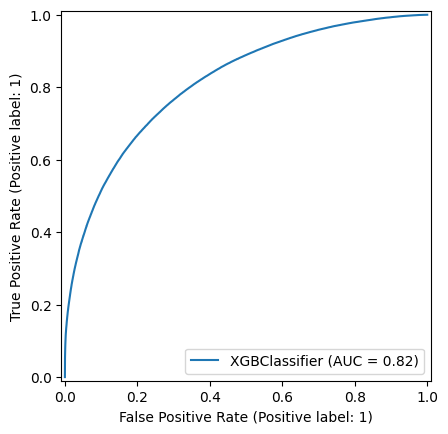

In [100]:
RocCurveDisplay.from_estimator(opt.best_estimator_,test_df[feat_imp_short['columns']], test_df['preventive_visit_gap_ind'])

In [102]:
test_score_bay=pd.DataFrame(opt.best_estimator_.predict_proba(test_df[feat_imp_short['columns']]), columns=['p0','p1'])

In [103]:
roc_auc_score(test_df['preventive_visit_gap_ind'],test_score_bay['p1'])

0.8155428506620102